In [1]:
import PIL
from PIL import Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import copy
%matplotlib inline

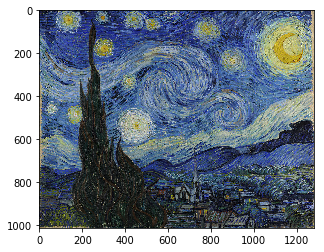

In [2]:
filename="starrynight.jpg"
image=PIL.Image.open(filename)
np.shape(image)
plt.imshow(np.float32(image)/255)
plt.show()

In [3]:
array=np.float32(image)
v=.1

def noise(image,v):
    v=int(v*image.shape[1])
    for i,sample in enumerate(image):
        mask=np.random.randint(0,len(sample),v)
        for m in mask:
            if np.random.random() < 0.5:
                image[i,m]=1
            else:
                image[i,m]=0
    return image            
                
   

In [4]:
from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets("/tmp/data",one_hot=True)

Extracting /tmp/data\train-images-idx3-ubyte.gz
Extracting /tmp/data\train-labels-idx1-ubyte.gz
Extracting /tmp/data\t10k-images-idx3-ubyte.gz
Extracting /tmp/data\t10k-labels-idx1-ubyte.gz


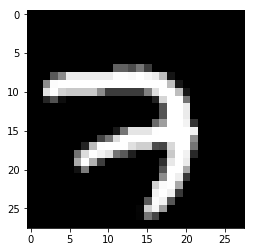

In [5]:
training_data=mnist.train.images[:10000]
real_training_data=np.zeros_like(training_data)
np.copyto(real_training_data,training_data)
plt.imshow(np.reshape(real_training_data[0],(28,28)),cmap='gray')


In [6]:
noisy_images=np.array([np.ndarray.flatten(noise(np.reshape(img,(28,28)),v=0.2)) for img in real_training_data])


(10000, 784)


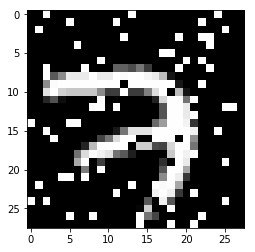

In [7]:
print(noisy_images.shape)
plt.imshow(np.reshape(noisy_images[0],(28,28)),cmap='gray')



In [22]:
flattened_size=28*28
X=tf.placeholder(tf.float32,shape=[None,flattened_size])
X_noise=tf.placeholder(tf.float32,shape=[None,flattened_size])
latent_size=800
W=tf.Variable(tf.truncated_normal([flattened_size,latent_size],stddev=0.1),name="weights")

b1=tf.Variable(tf.zeros([latent_size]),name="biases_1")
b2=tf.Variable(tf.zeros([flattened_size]),name="biases_2")


hidden_layer=tf.nn.sigmoid(tf.matmul(X_noise,W)+b1)

reconstructed=tf.nn.sigmoid(tf.matmul(hidden_layer,tf.transpose(W))+b2)
loss=tf.reduce_mean(tf.square(X-reconstructed))
optimizer=tf.train.AdamOptimizer(0.1).minimize(loss)


epoch:0


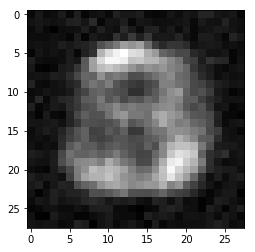

loss:0.1068330705165863


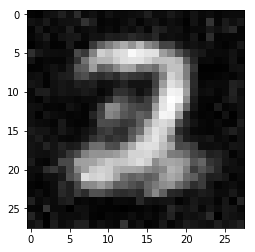

loss:0.09775825589895248
epoch:100


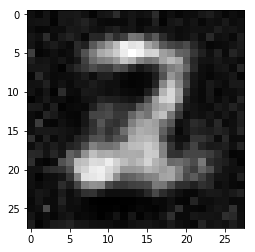

loss:0.09731467068195343


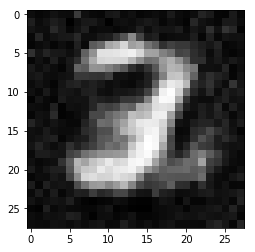

loss:0.09713296592235565
epoch:200


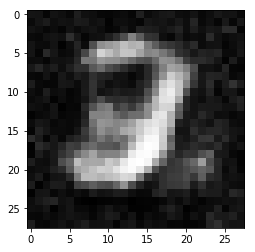

loss:0.09727330505847931


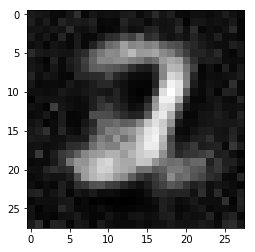

loss:0.0970979630947113
epoch:300


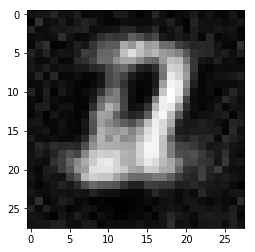

loss:0.09711116552352905


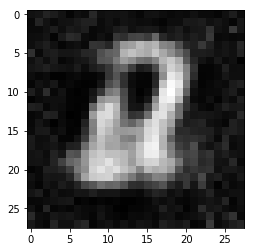

loss:0.0970015898346901
epoch:400


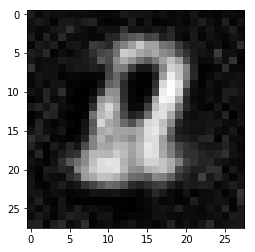

loss:0.0970173329114914


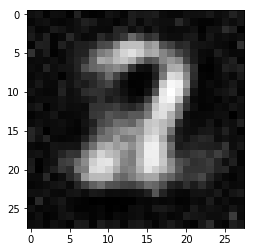

loss:0.09685645997524261
epoch:500


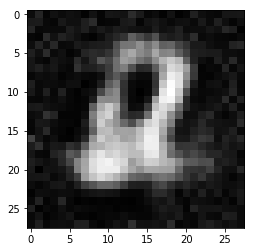

loss:0.09692757576704025


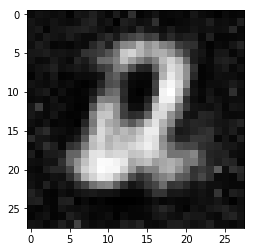

loss:0.0968823954463005
epoch:600


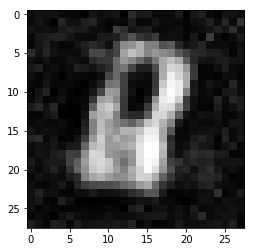

loss:0.09684818238019943


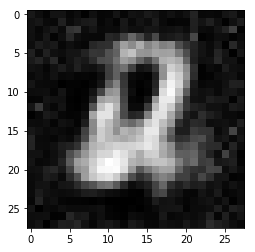

loss:0.09705844521522522
epoch:700


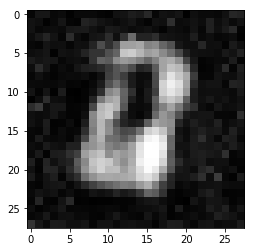

loss:0.09725494682788849


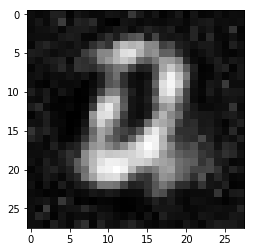

loss:0.09701285511255264
epoch:800


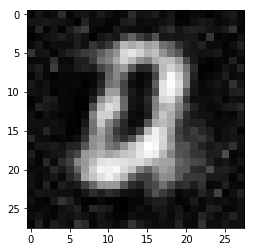

loss:0.09719026833772659


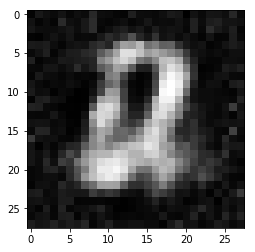

loss:0.09680824726819992
epoch:900


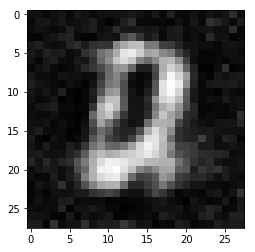

loss:0.09714162349700928


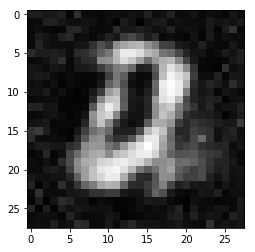

loss:0.09724646061658859
Model saved in file: /tmp/checkpoints-denoiser.ckpt


In [23]:

epochs=1000
batch_size=200
loss_array=[]
init=tf.global_variables_initializer()
sess=tf.InteractiveSession()
sess.run(init)
saver=tf.train.Saver()
for epoch in range(epochs):
    if epoch%100==0:
        print("epoch:{}".format(epoch))
    
    for i in range(0,10000//batch_size):
        
        feed_dict={X:real_training_data[batch_size*i:(batch_size)*(i+1)],X_noise:noisy_images[batch_size*i:(batch_size)*(i+1)]}
        optimiser=sess.run(optimizer,feed_dict=feed_dict)
    if epoch%50==0:
            
        loss1=loss.eval(feed_dict=feed_dict)
        loss_array.append(loss1)
        reconstruction=reconstructed.eval(feed_dict=feed_dict)
        plt.imshow(np.reshape(reconstruction[0],(28,28)),cmap='gray')
        plt.show()    
        print("loss:{}".format(loss1))
    
save_path = saver.save(sess, "/tmp/checkpoints-denoiser.ckpt")
print("Model saved in file: %s" % save_path)    

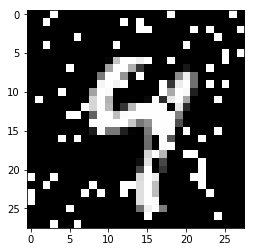

In [72]:

plt.imshow(np.reshape(real_training_data[2],(28,28)),cmap='gray')
plt.show()

In [25]:
saver.restore(sess, "/tmp/checkpoints-denoiser.ckpt")
print("Model restored.")

INFO:tensorflow:Restoring parameters from /tmp/checkpoints-denoiser.ckpt
Model restored.


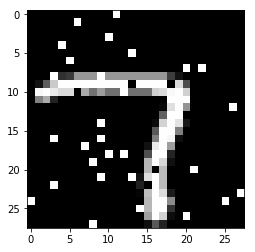

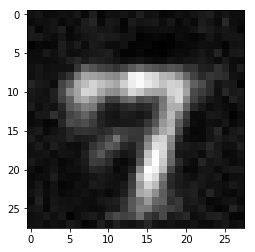

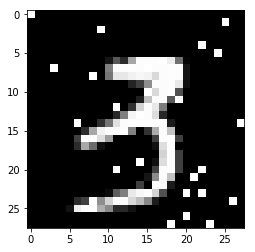

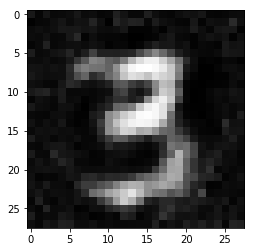

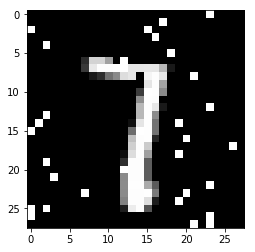

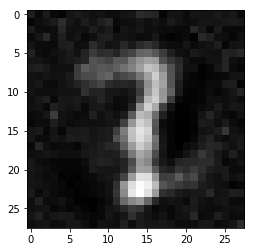

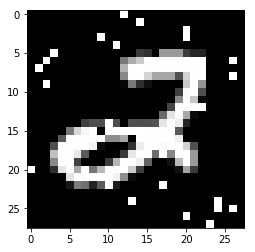

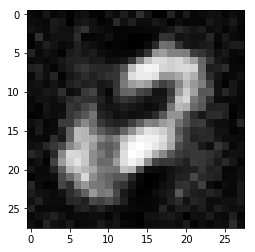

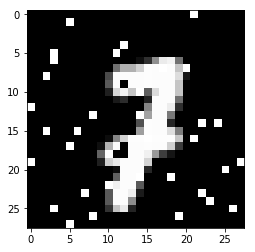

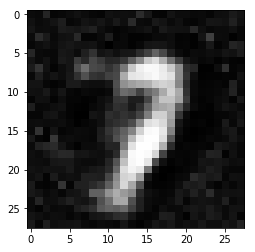

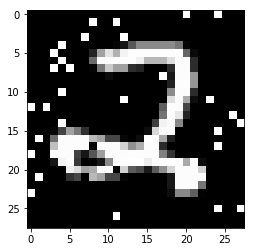

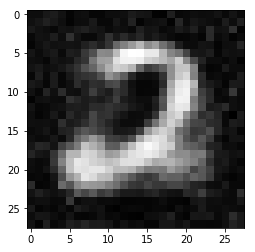

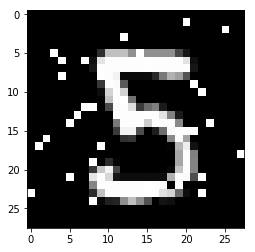

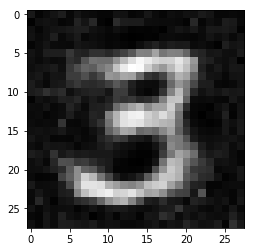

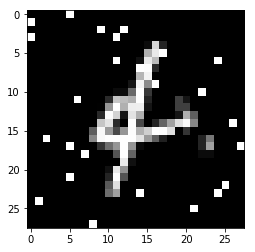

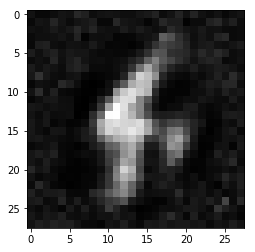

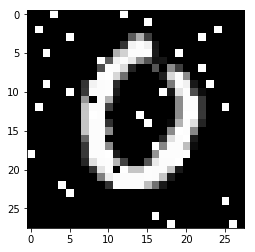

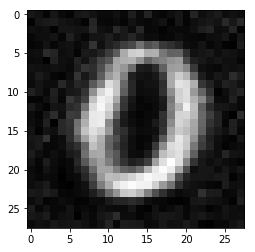

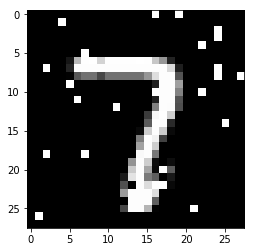

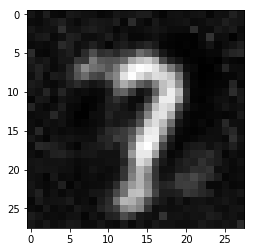

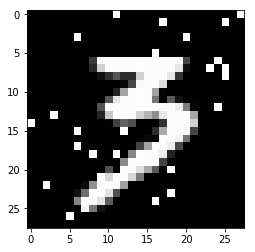

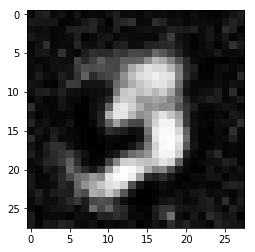

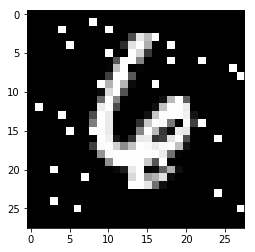

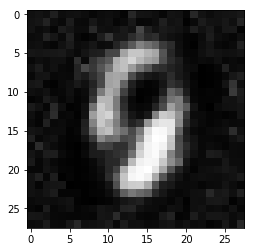

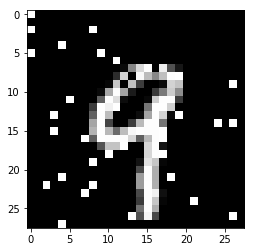

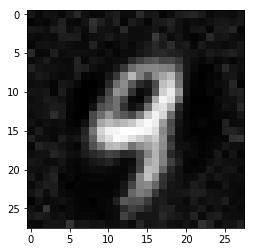

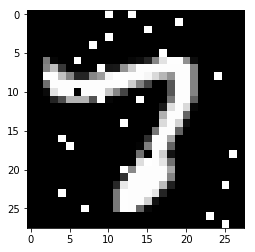

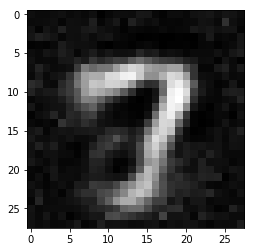

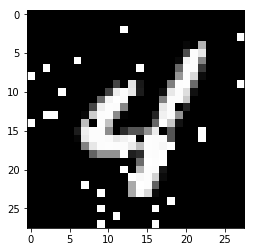

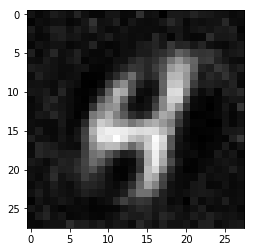

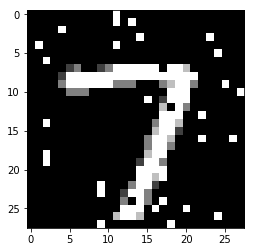

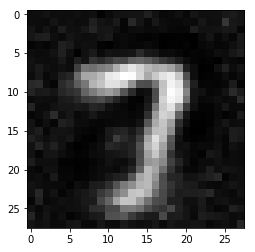

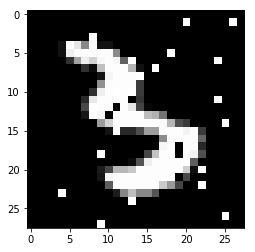

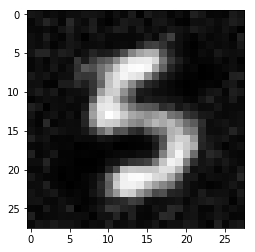

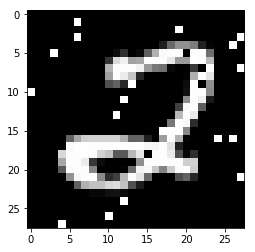

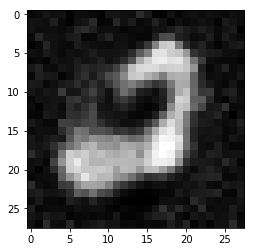

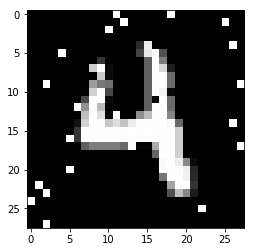

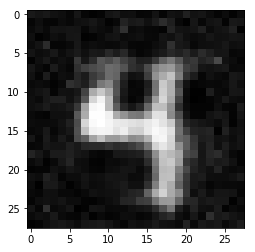

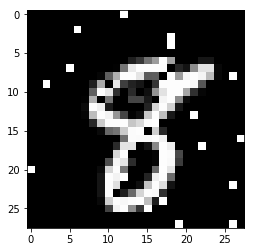

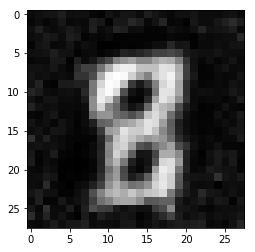

In [28]:
noisy_image=np.array([np.ndarray.flatten(noise(np.reshape(img,(28,28)),v=0.1)) for img in mnist.train.images[10200:10220]])
pred = sess.run(reconstructed, feed_dict={X_noise: np.array(noisy_image)})


for i,img in enumerate(pred):
    plt.imshow(np.reshape(noisy_image[i],(28,28)),cmap='gray')
    plt.show()
    plt.imshow(np.reshape(img,(28,28)),cmap='gray')
    plt.show()
